In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# data collection and processing

In [3]:
data=pd.read_csv('gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
print('Rows: ',data.shape[0])
print('Columns: ',data.shape[1])

Rows:  2290
Columns:  6


In [5]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [14]:
# correlation
correlation=data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

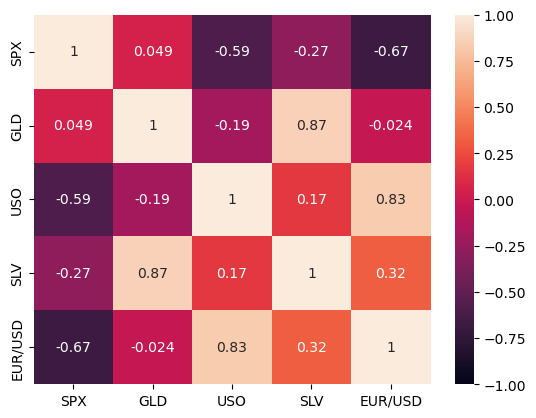

In [24]:
# heatmap
sns.heatmap(correlation,annot=True,vmax=1,vmin=-1)

In [17]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

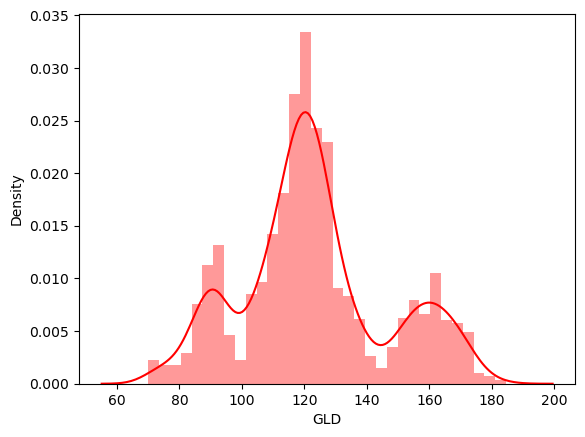

In [21]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='red')

In [25]:
#Splitting the Features and Target

In [26]:
x=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

In [27]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
# Splitting into Training data and Test Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


In [31]:
# Model Training: Random Forest Regressor

In [32]:
regressor=RandomForestRegressor(n_estimators=100)

In [33]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
#Model Evaluation

In [35]:
# prediction on Test Data
test_data_pred=regressor.predict(x_test)

In [36]:
print(test_data_pred)

[168.48779922  82.09839982 116.12829998 127.65070086 120.62760131
 154.81119764 150.47389885 126.1561007  117.44779875 125.98900053
 116.48170086 172.05510116 141.2111982  167.74319868 115.09240005
 117.75740057 138.59540268 170.44730079 159.82700334 159.69119936
 155.17230004 125.3271003  175.93379952 157.02290316 125.24520051
  94.08309959  77.78020021 120.5013999  119.04459908 167.54049989
  88.22390022 125.22320006  91.29830107 117.7507001  121.08569884
 136.05620045 115.60810113 114.88750076 146.97809967 107.33500093
 104.10210202  87.16259786 126.60740036 117.72609969 153.65329898
 119.67649991 108.36479963 108.27549862  93.21220027 127.01949809
  75.05530044 113.77579935 121.38729975 111.31589935 118.8769991
 120.6940996  158.55289927 168.17220079 146.98569699  85.89009868
  94.46260028  86.95059903  90.74870022 119.11990059 126.51600068
 127.3761001  170.08899974 122.2999995  117.23999907  98.71320015
 168.25460088 143.0838985  132.42140229 121.28110235 120.95029958
 119.733600

In [38]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_pred)
print('R2 score: ',error_score)

R2 score:  0.9895591097450741


In [39]:
# Compare the Actual Values and Predicted Values in a Plot

In [40]:
y_test=list(y_test)

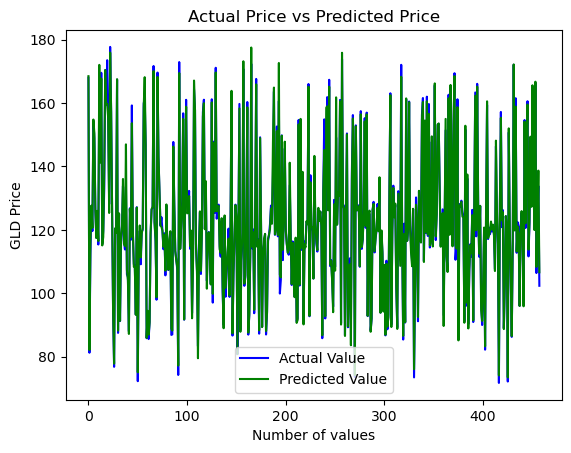

In [43]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [44]:
# we have synchronization to each other that means we have successfully used Random Forest Regressor Model to find the Gold price based upon several other prices.
